In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
mpl.rc('font',family='TeX Gyre Bonum')
plt.rcParams['mathtext.fontset'] = 'cm'
# plt.rcParams['text.usetex'] = True

In [12]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [5]:
data = pd.read_excel("data.xlsx",header=6,usecols="B,E,F",nrows=29).dropna()

In [6]:
data

,Thickness (mm),Count rate,Corrected Rate
0,0.000000,8.855556,8.574444
2,1.110000,1.208333,0.927222
4,2.226667,1.150000,0.868889
6,3.333333,1.037500,0.756389
8,4.366667,1.145833,0.864722
10,5.416667,0.916667,0.635556
12,5.326667,0.841667,0.560556
14,6.436667,0.850000,0.568889
16,7.553333,0.791667,0.510556
18,8.660000,0.829167,0.548056


In [7]:
thick = np.array(data["Thickness (mm)"][1:])
count_rate = np.array(data["Count rate"][1:])
corrected_rate = np.array(data["Corrected Rate"][1:])

In [8]:
def f(x,a,b):
    return a*x+b    

In [9]:
param,paramcov = curve_fit(f, thick, np.log(count_rate))
print(param)
x = np.linspace(thick[0],thick[-1],1000)
y = f(x, *param)
perr = np.sqrt(np.diag(paramcov))
perr

[-0.06162765  0.26305147]


array([0.00573457, 0.04548936])

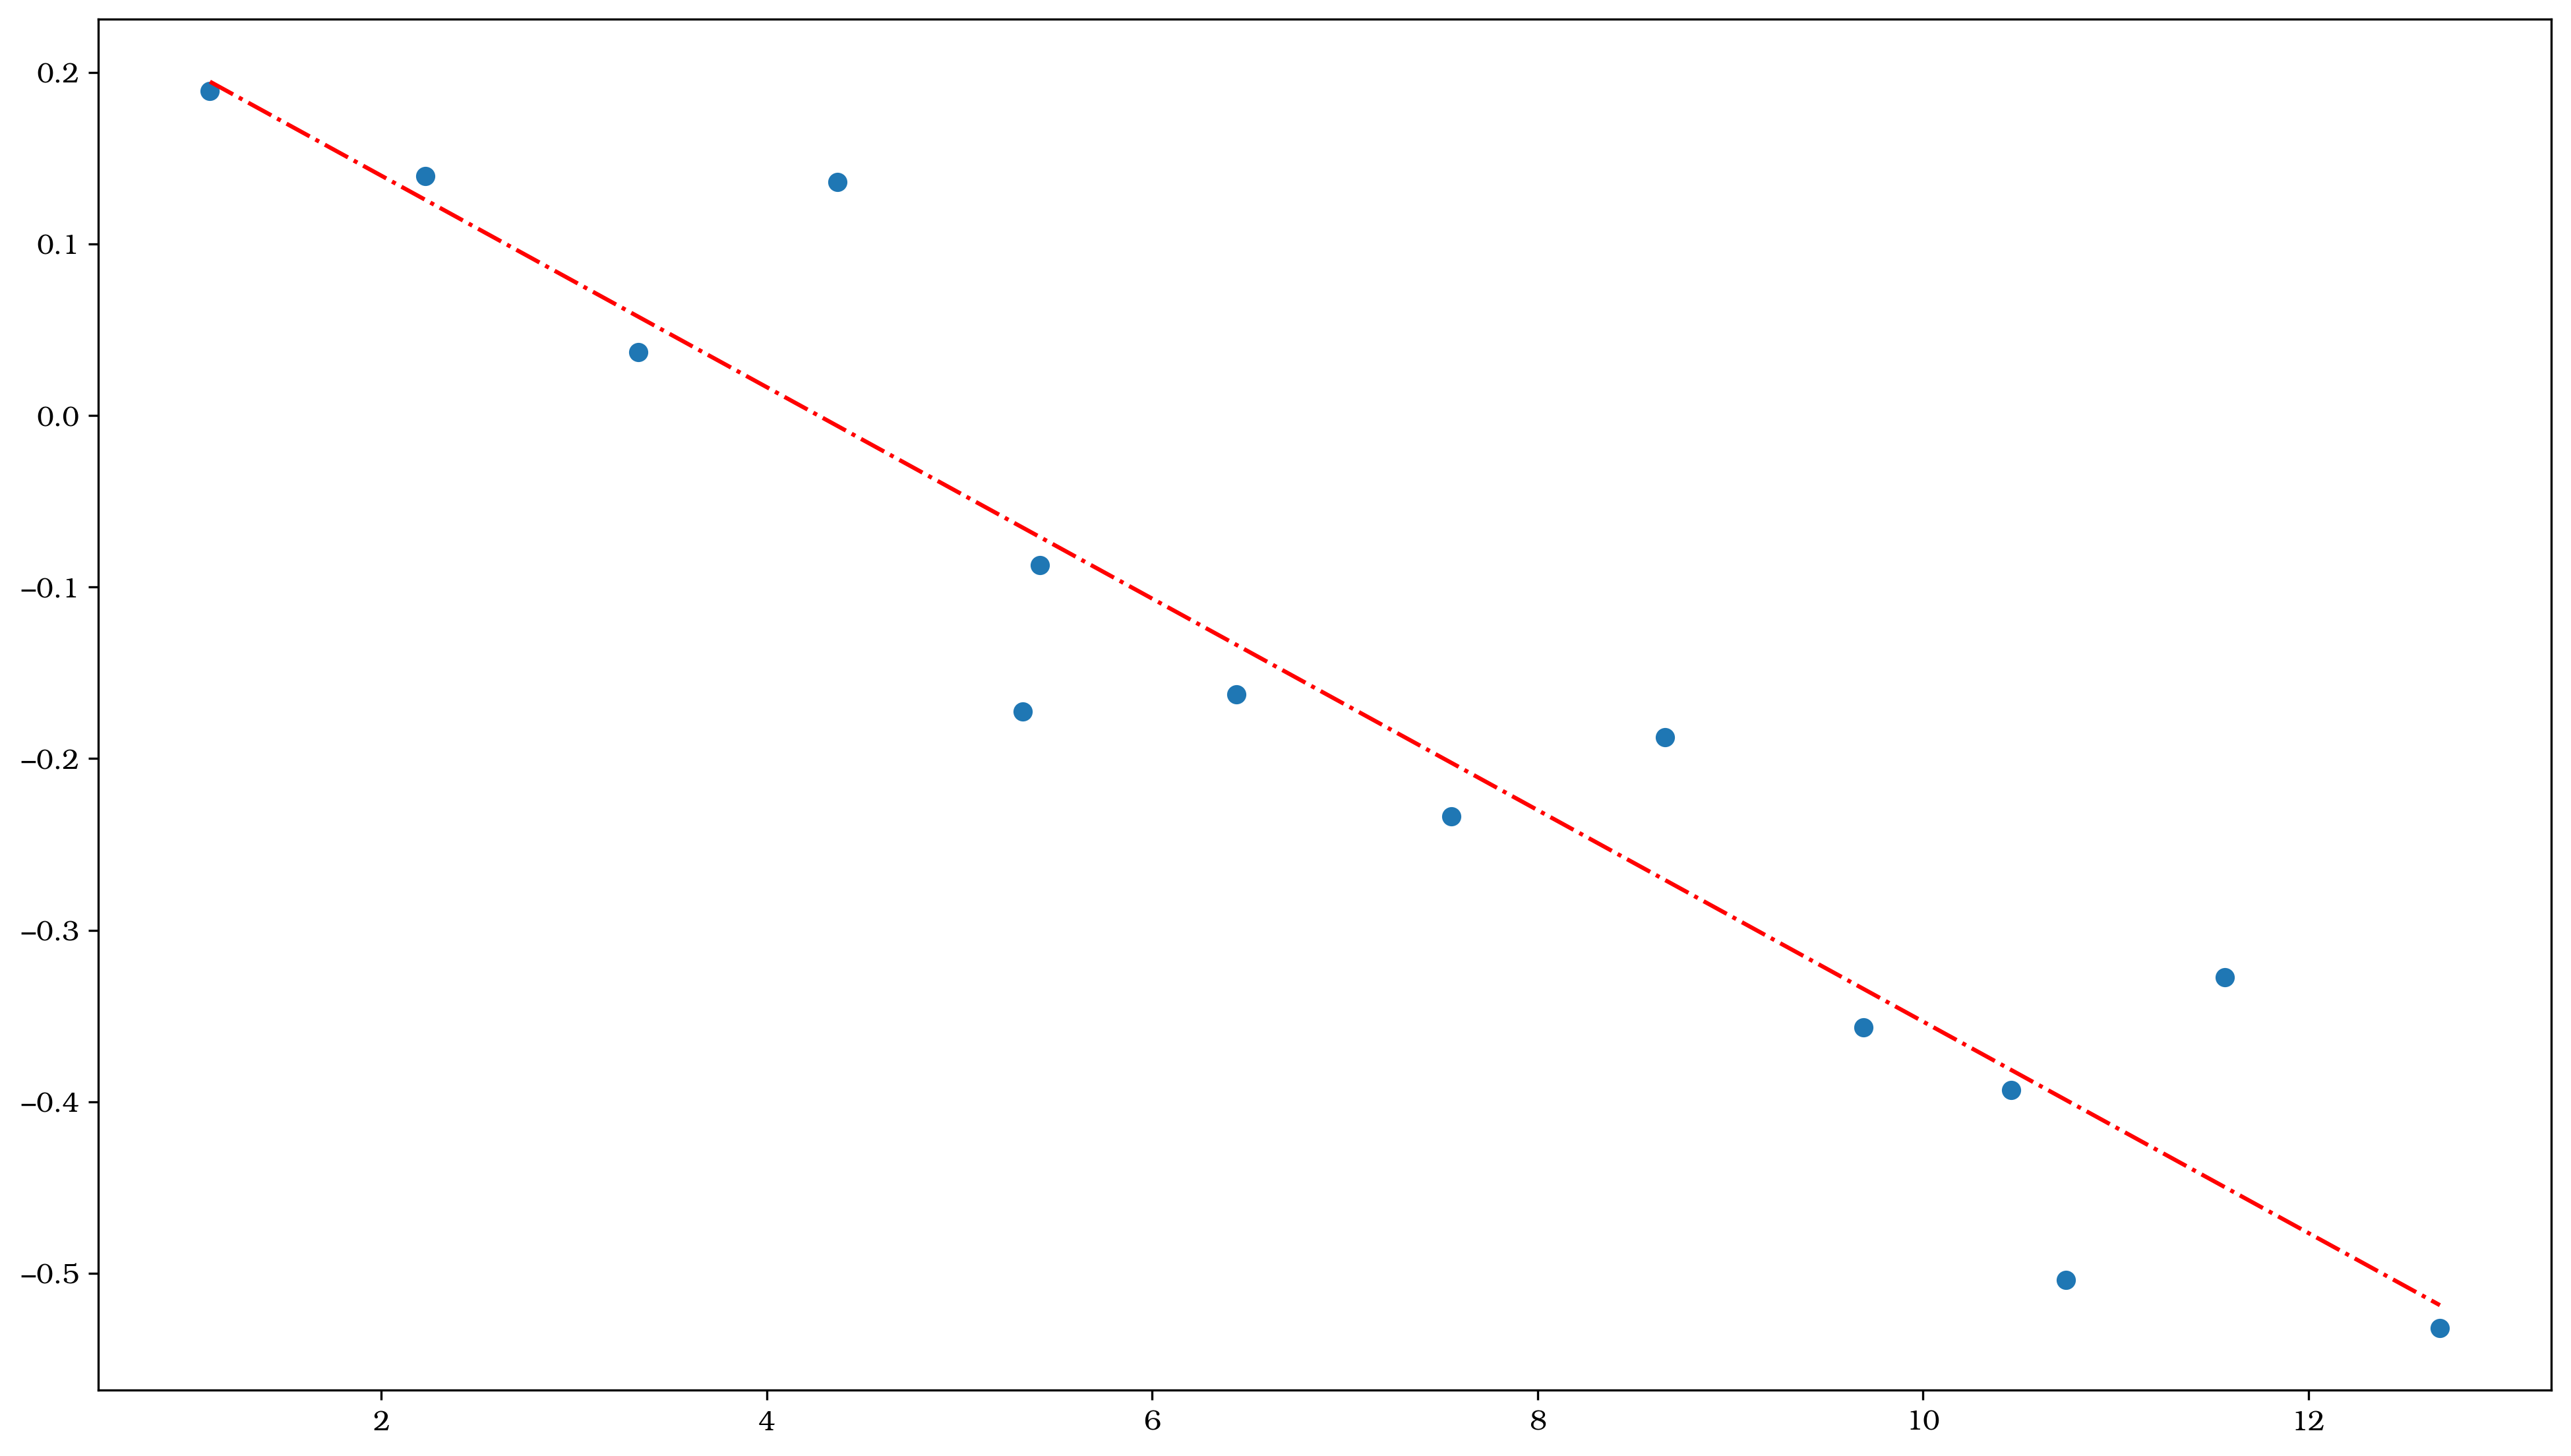

In [10]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.plot(x,y,ls='-.', color='r')
axes.scatter(thick, np.log(count_rate))

In [52]:
param1,paramcov1 = curve_fit(f, thick, np.log(corrected_rate))
print(param1)
x1 = np.linspace(thick[0],thick[-1],1000)
y1 = f(x, *param1)
perr1 = np.sqrt(np.diag(paramcov1))
perr1

[-0.0935731   0.06219076]


array([0.00890454, 0.07063503])

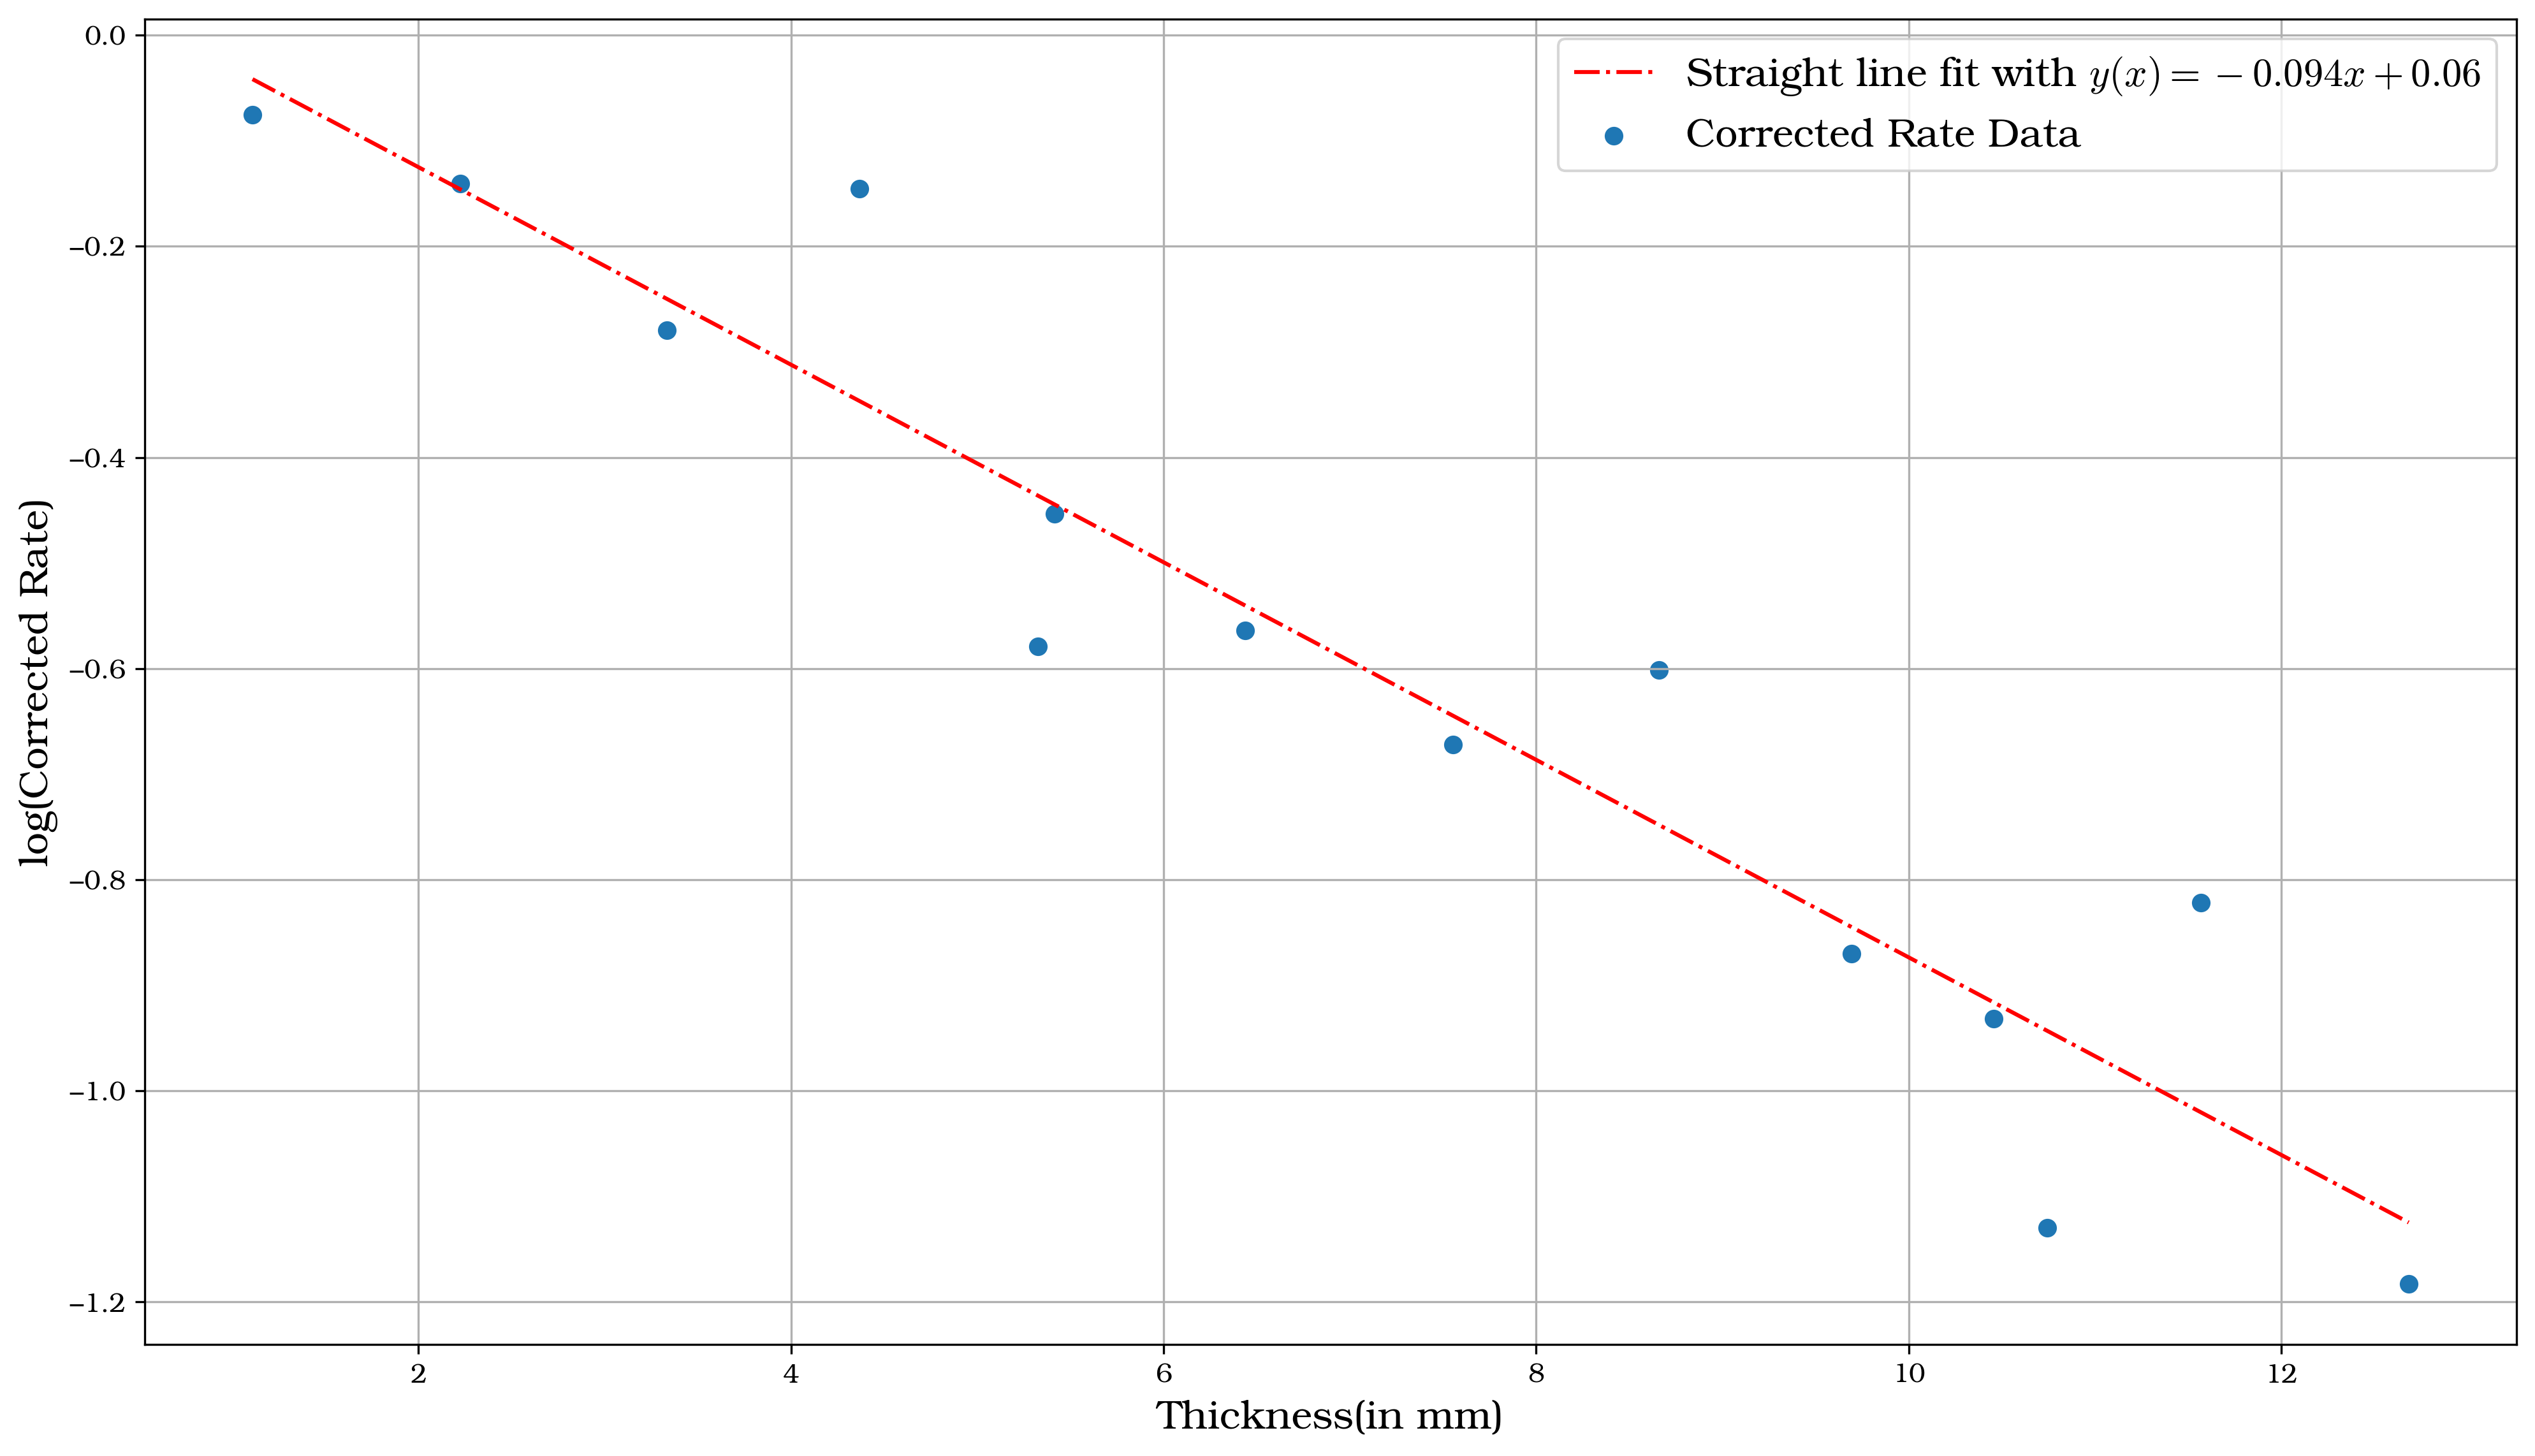

In [54]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.plot(x1,y1,'r-.',label=r"Straight line fit with $y(x) = -0.094x + 0.06$")
axes.scatter(thick, np.log(corrected_rate), label='Corrected Rate Data')
axes.legend(fontsize=15)
axes.set_xlabel("Thickness(in mm)", fontsize=15)
axes.set_ylabel("log(Corrected Rate)", fontsize=15)
axes.grid()
fig.savefig("logcorr.png", dpi=600)

In [22]:
datainv = pd.read_excel("gmd.xlsx",sheet_name=1, header=5,usecols="O,P,R",nrows=55).dropna()
datainv

,Time,Distance,Avg Count
0,60.0,0.0,72.333333
3,60.0,-0.5,76.333333
6,60.0,-1.0,72.333333
9,60.0,-1.5,85.333333
12,60.0,-2.0,97.666667
15,60.0,-2.5,109.333333
18,60.0,-3.0,120.000000
21,60.0,-3.5,127.333333
24,60.0,-4.0,131.666667
27,60.0,-4.5,162.666667


In [38]:
xd = np.array(datainv['Distance '])
yc = np.array(datainv['Avg Count'])
xd = xd+10
kx = 1/(xd**2)
xd,yc, kx

(array([10. ,  9.5,  9. ,  8.5,  8. ,  7.5,  7. ,  6.5,  6. ,  5.5,  5. ,
         4.5,  4. ,  3.5,  3. ,  2.5,  2. ,  1.5]),
 array([ 72.33333333,  76.33333333,  72.33333333,  85.33333333,
         97.66666667, 109.3333333 , 120.        , 127.3333333 ,
        131.6666667 , 162.6666667 , 176.6666667 , 190.6666667 ,
        224.        , 279.        , 333.6666667 , 375.3333333 ,
        462.6666667 , 561.6666667 ]),
 array([0.01      , 0.01108033, 0.01234568, 0.01384083, 0.015625  ,
        0.01777778, 0.02040816, 0.02366864, 0.02777778, 0.03305785,
        0.04      , 0.04938272, 0.0625    , 0.08163265, 0.11111111,
        0.16      , 0.25      , 0.44444444]))

In [47]:
def f2(x, b,c):
    return x**c + b


In [48]:
pa1,pcov1 = curve_fit(f2, xd, yc)
print(pa1)
x2 = np.linspace(np.log(xd)[0],np.log(xd)[-1],1000)
y2 = f(x, *pa)
pe1 = np.sqrt(np.diag(pcov1))
pe1

[202.9688349   -0.82714406]


array([339.28328639, 858.77108845])

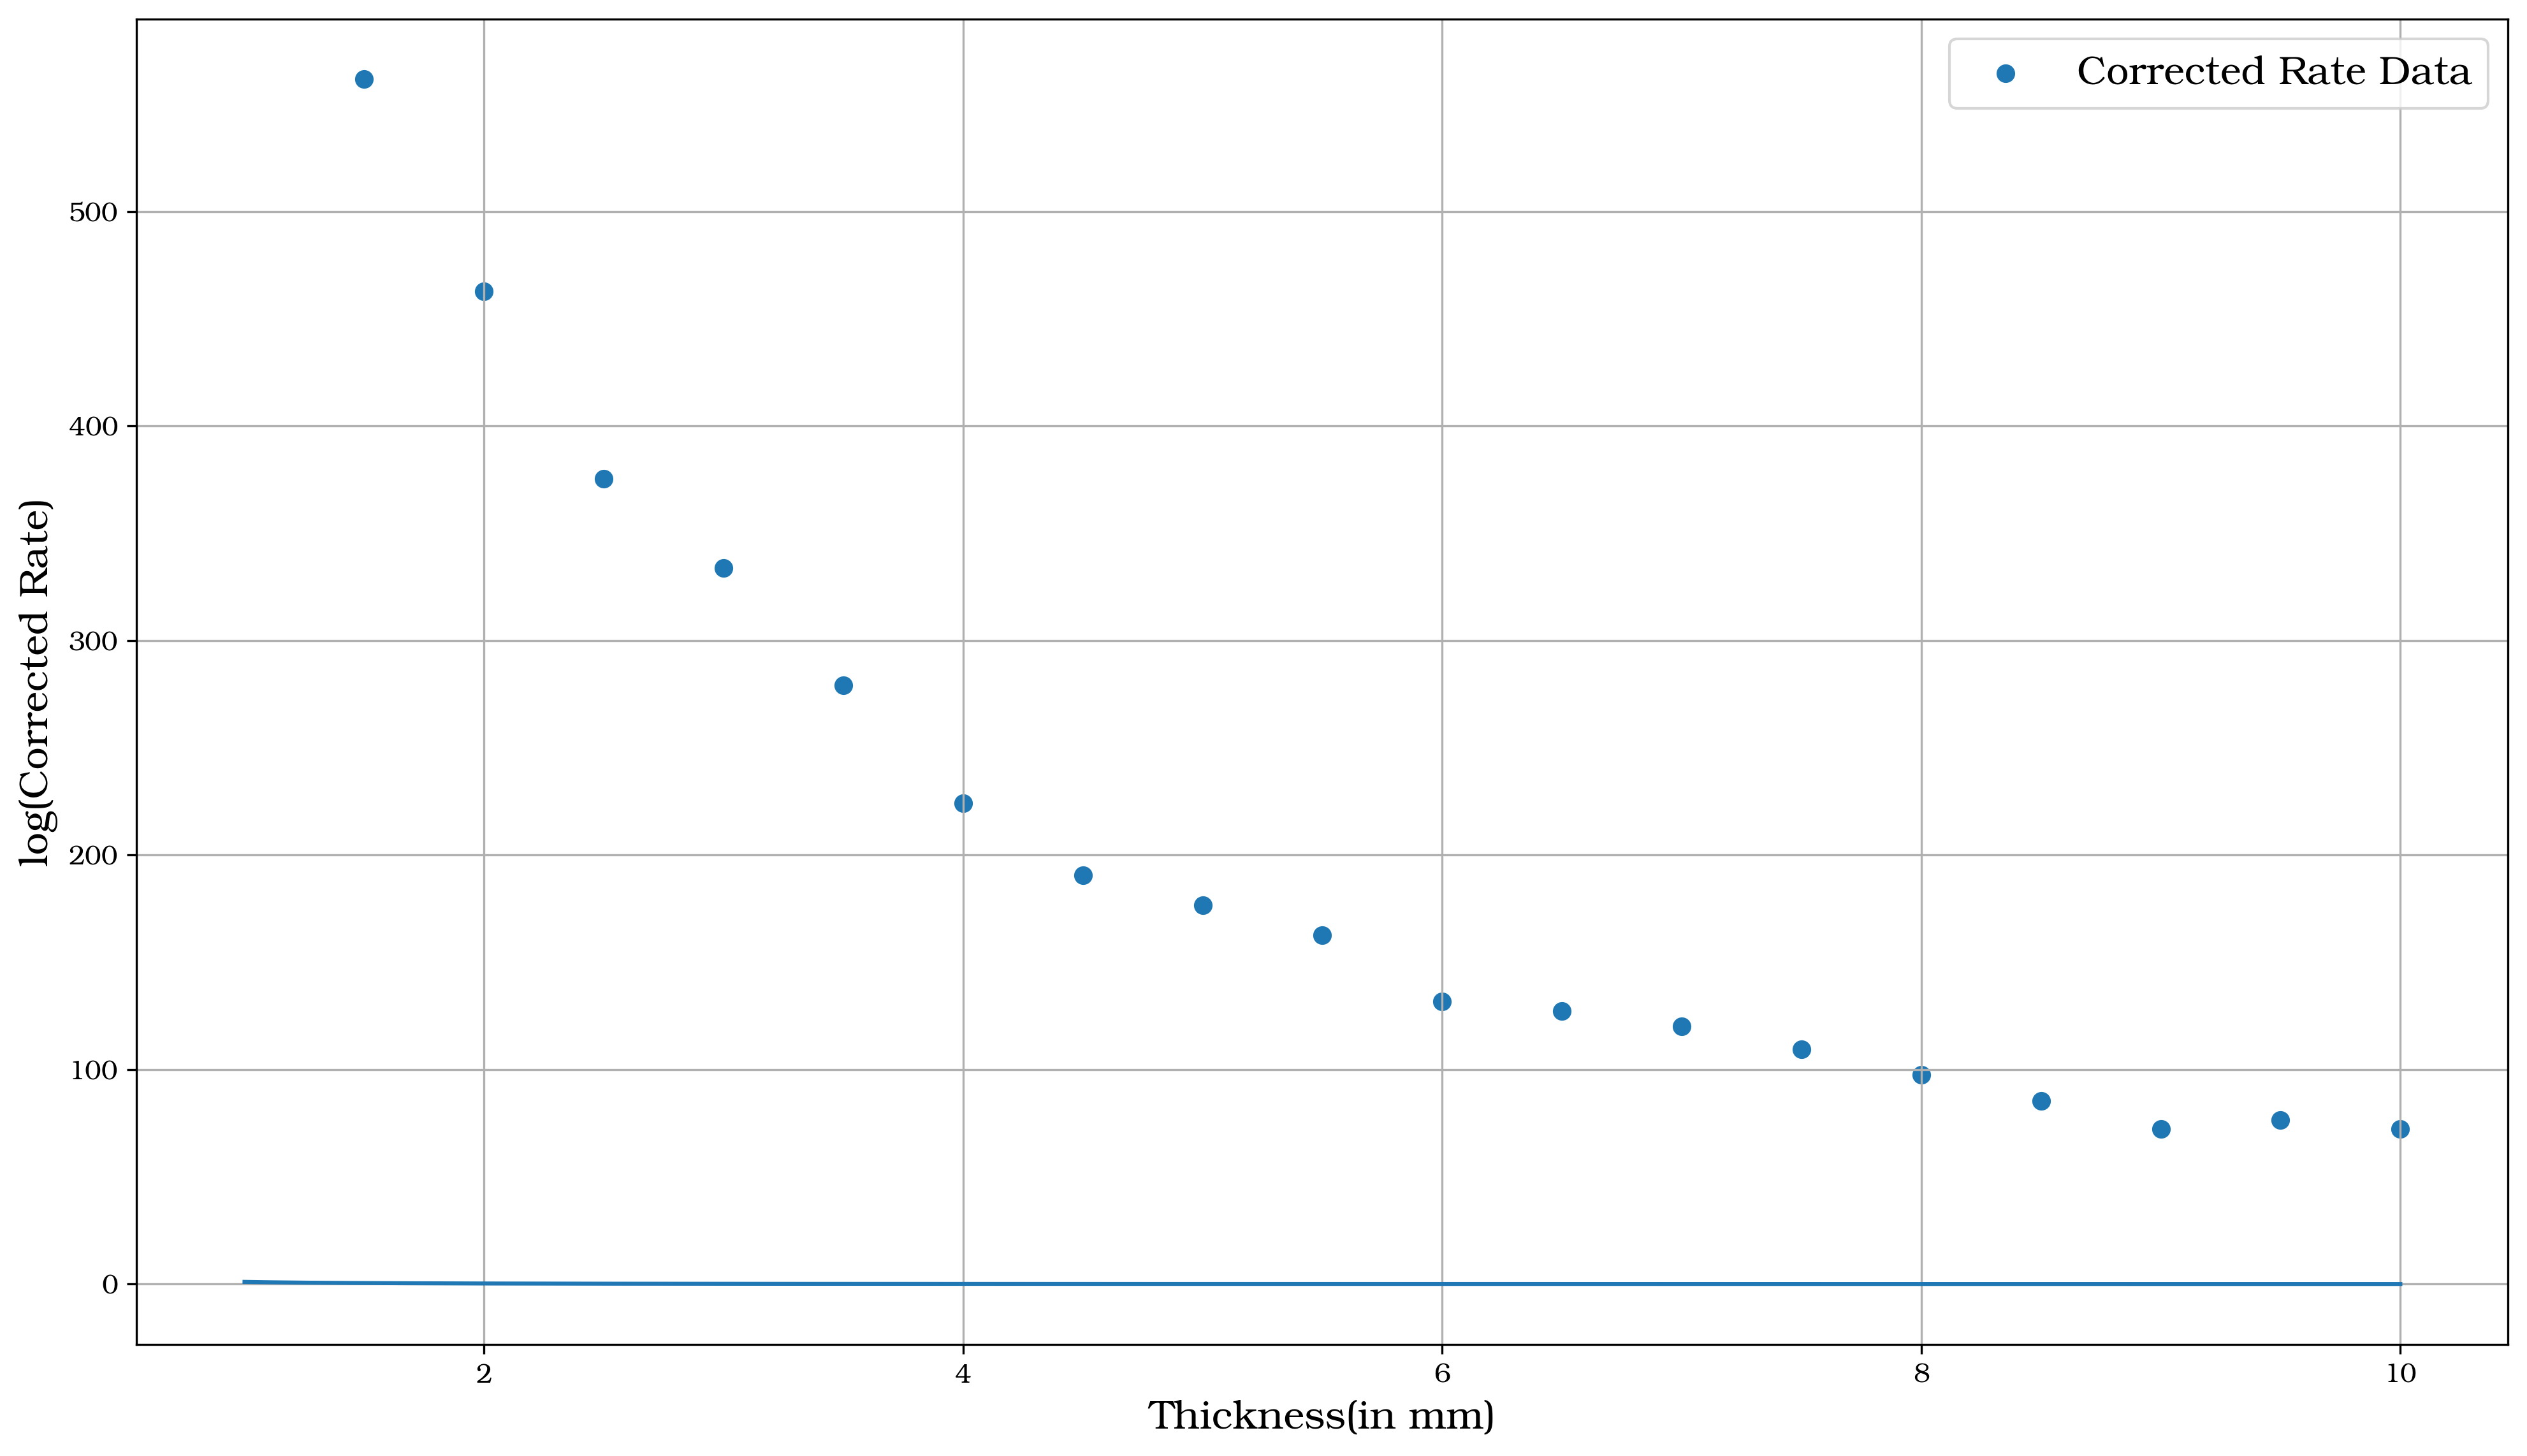

In [50]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
# axes.plot(x1,y1,'r-.',label=r"Straight line fit with $y(x) = -0.093x + 0.06$")
axes.scatter(xd,yc, label='Corrected Rate Data')
xx = np.linspace(1,10,1000)
axes.plot(xx, 1/xx**2)
axes.legend(fontsize=15)
axes.set_xlabel("Thickness(in mm)", fontsize=15)
axes.set_ylabel("log(Corrected Rate)", fontsize=15)
axes.grid()

/tmp/ipykernel_1243/2451495209.py:3: RuntimeWarning: divide by zero encountered in divide
  axes.scatter(1/xd**2,yc, label='Corrected Rate Data')


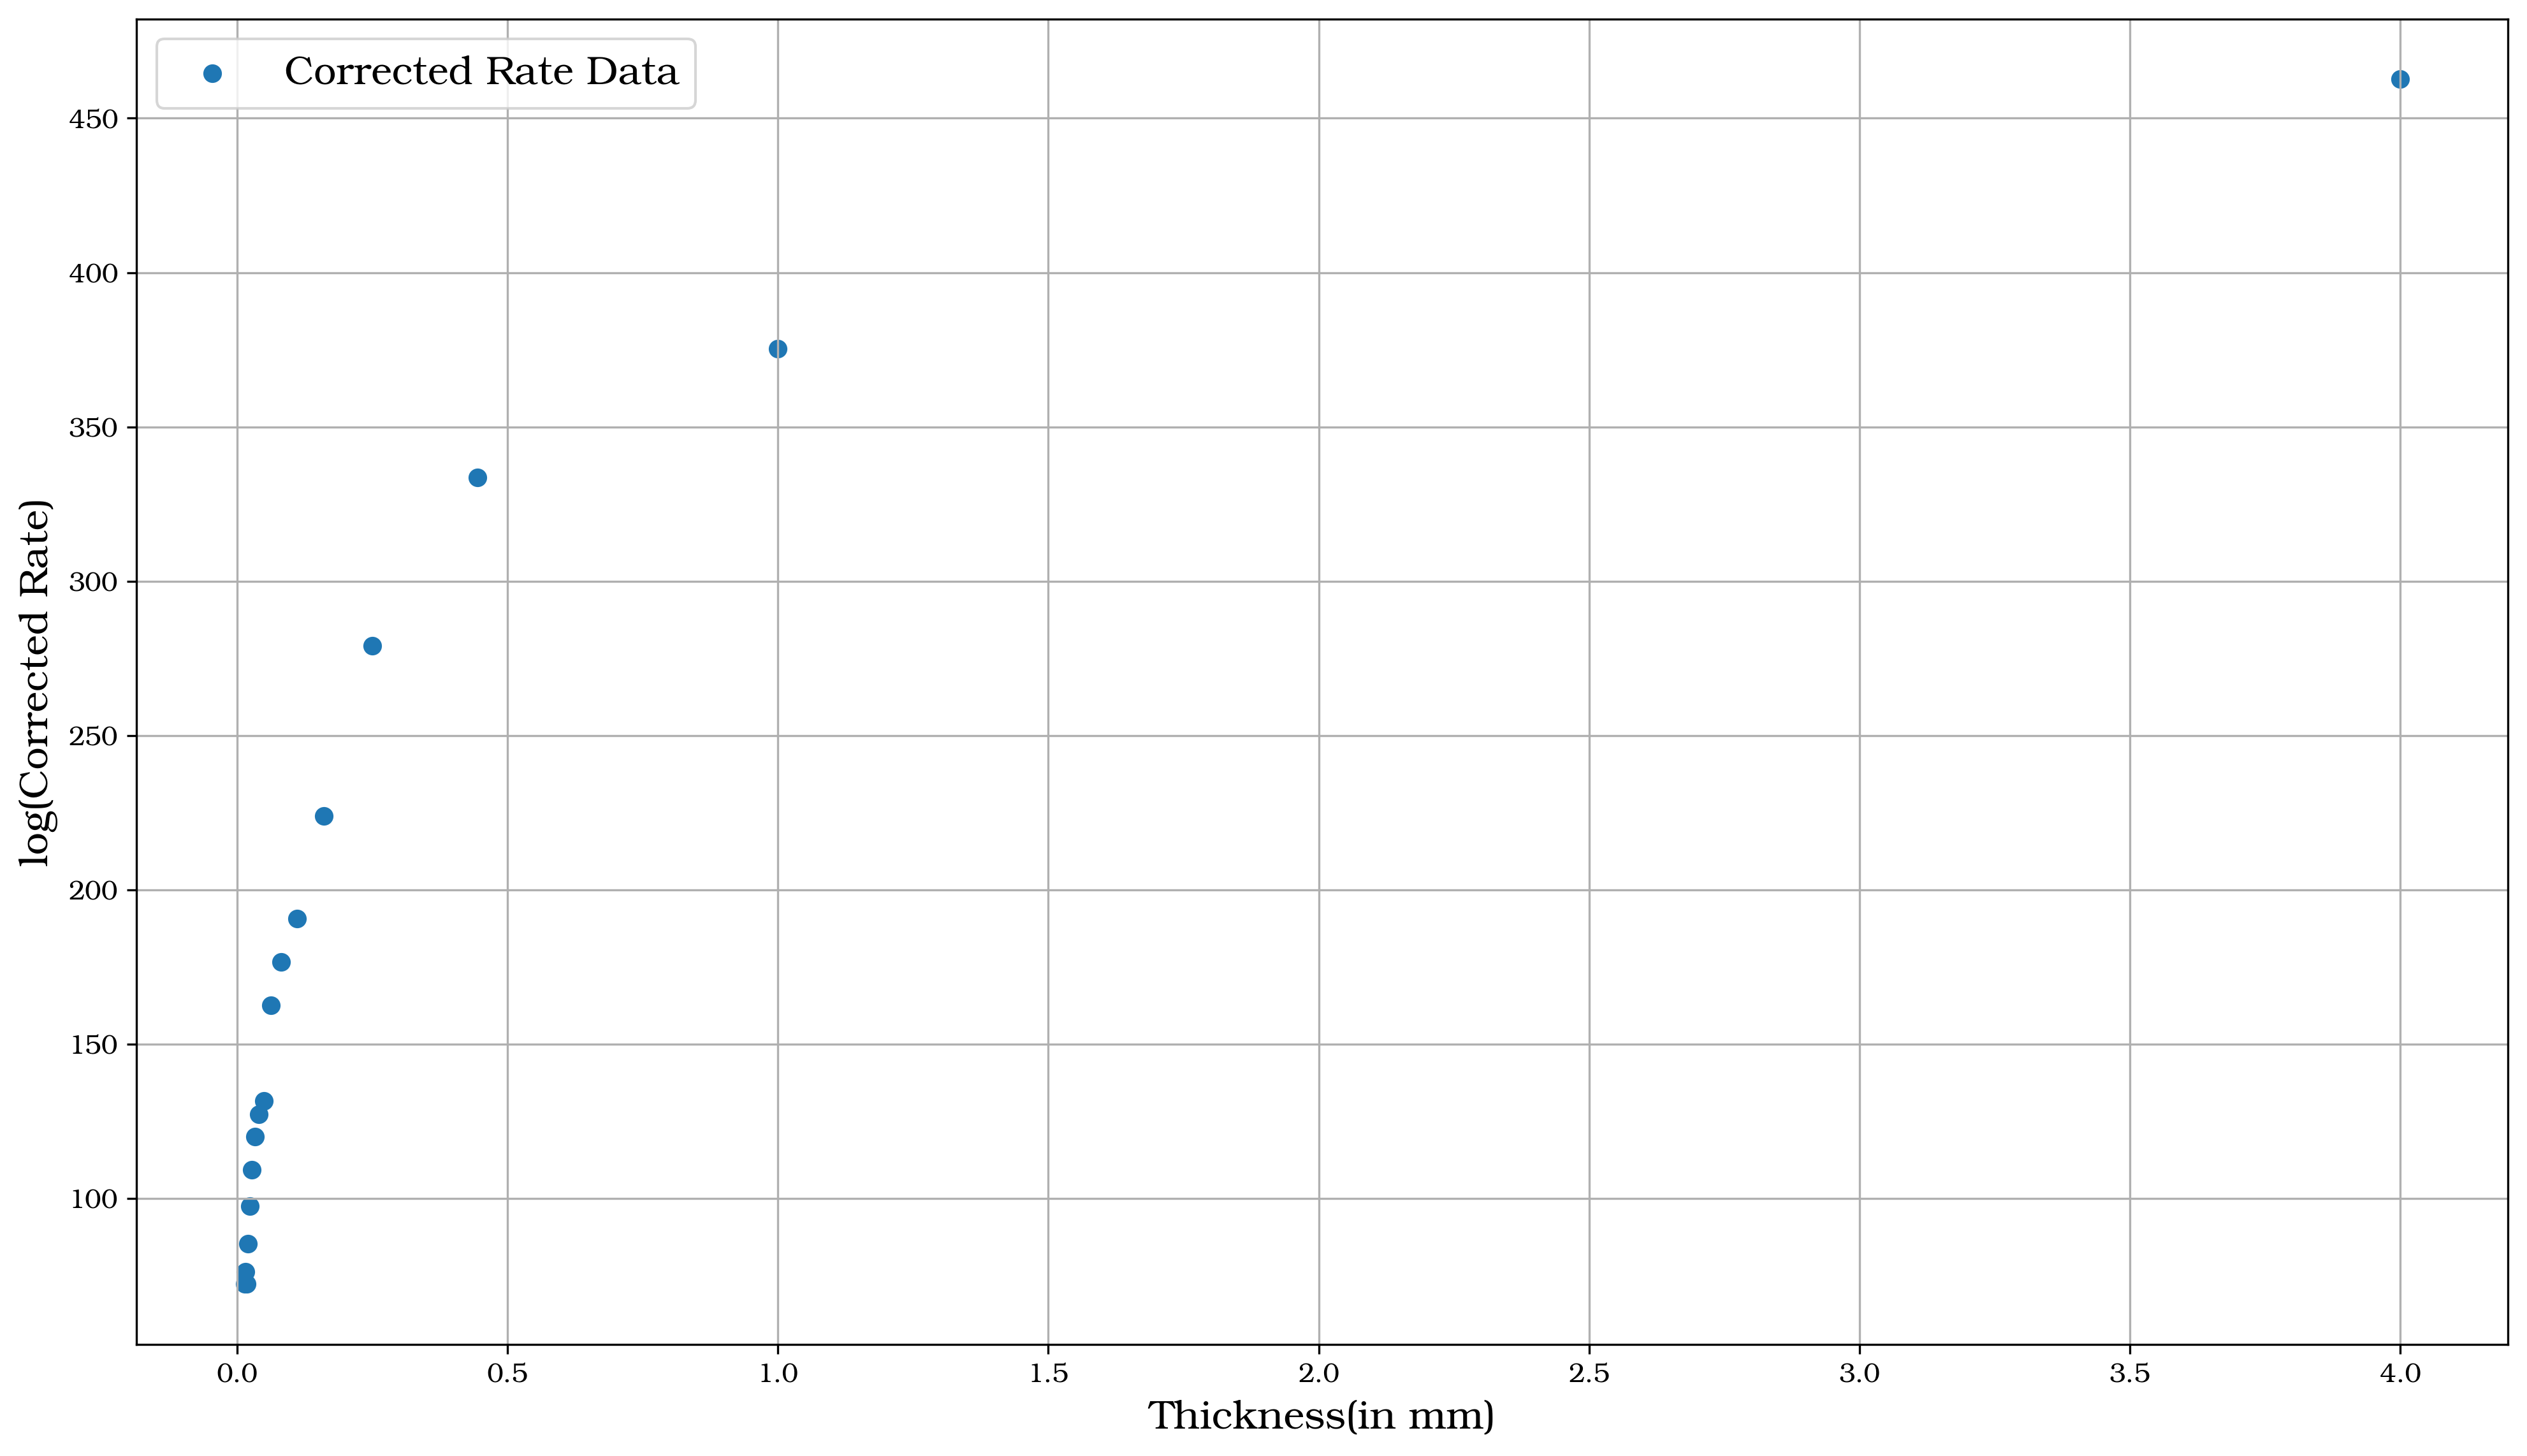

In [29]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
# axes.plot(x1,y1,'r-.',label=r"Straight line fit with $y(x) = -0.093x + 0.06$")
axes.scatter(1/xd**2,yc, label='Corrected Rate Data')
axes.legend(fontsize=15)
axes.set_xlabel("Thickness(in mm)", fontsize=15)
axes.set_ylabel("log(Corrected Rate)", fontsize=15)
axes.grid()

In [36]:
pa,pcov = curve_fit(f, np.log(xd), np.log(yc))
print(pa)
x1 = np.linspace(np.log(xd)[0],np.log(xd)[-1],1000)
y1 = f(x, *pa)
pe = np.sqrt(np.diag(pcov))
pe

[-1.15077009  6.97017546]


array([0.03485672, 0.05958797])

/tmp/ipykernel_1243/2490227695.py:3: RuntimeWarning: divide by zero encountered in log
  axes.scatter(np.log(xd),yc, label='Corrected Rate Data')


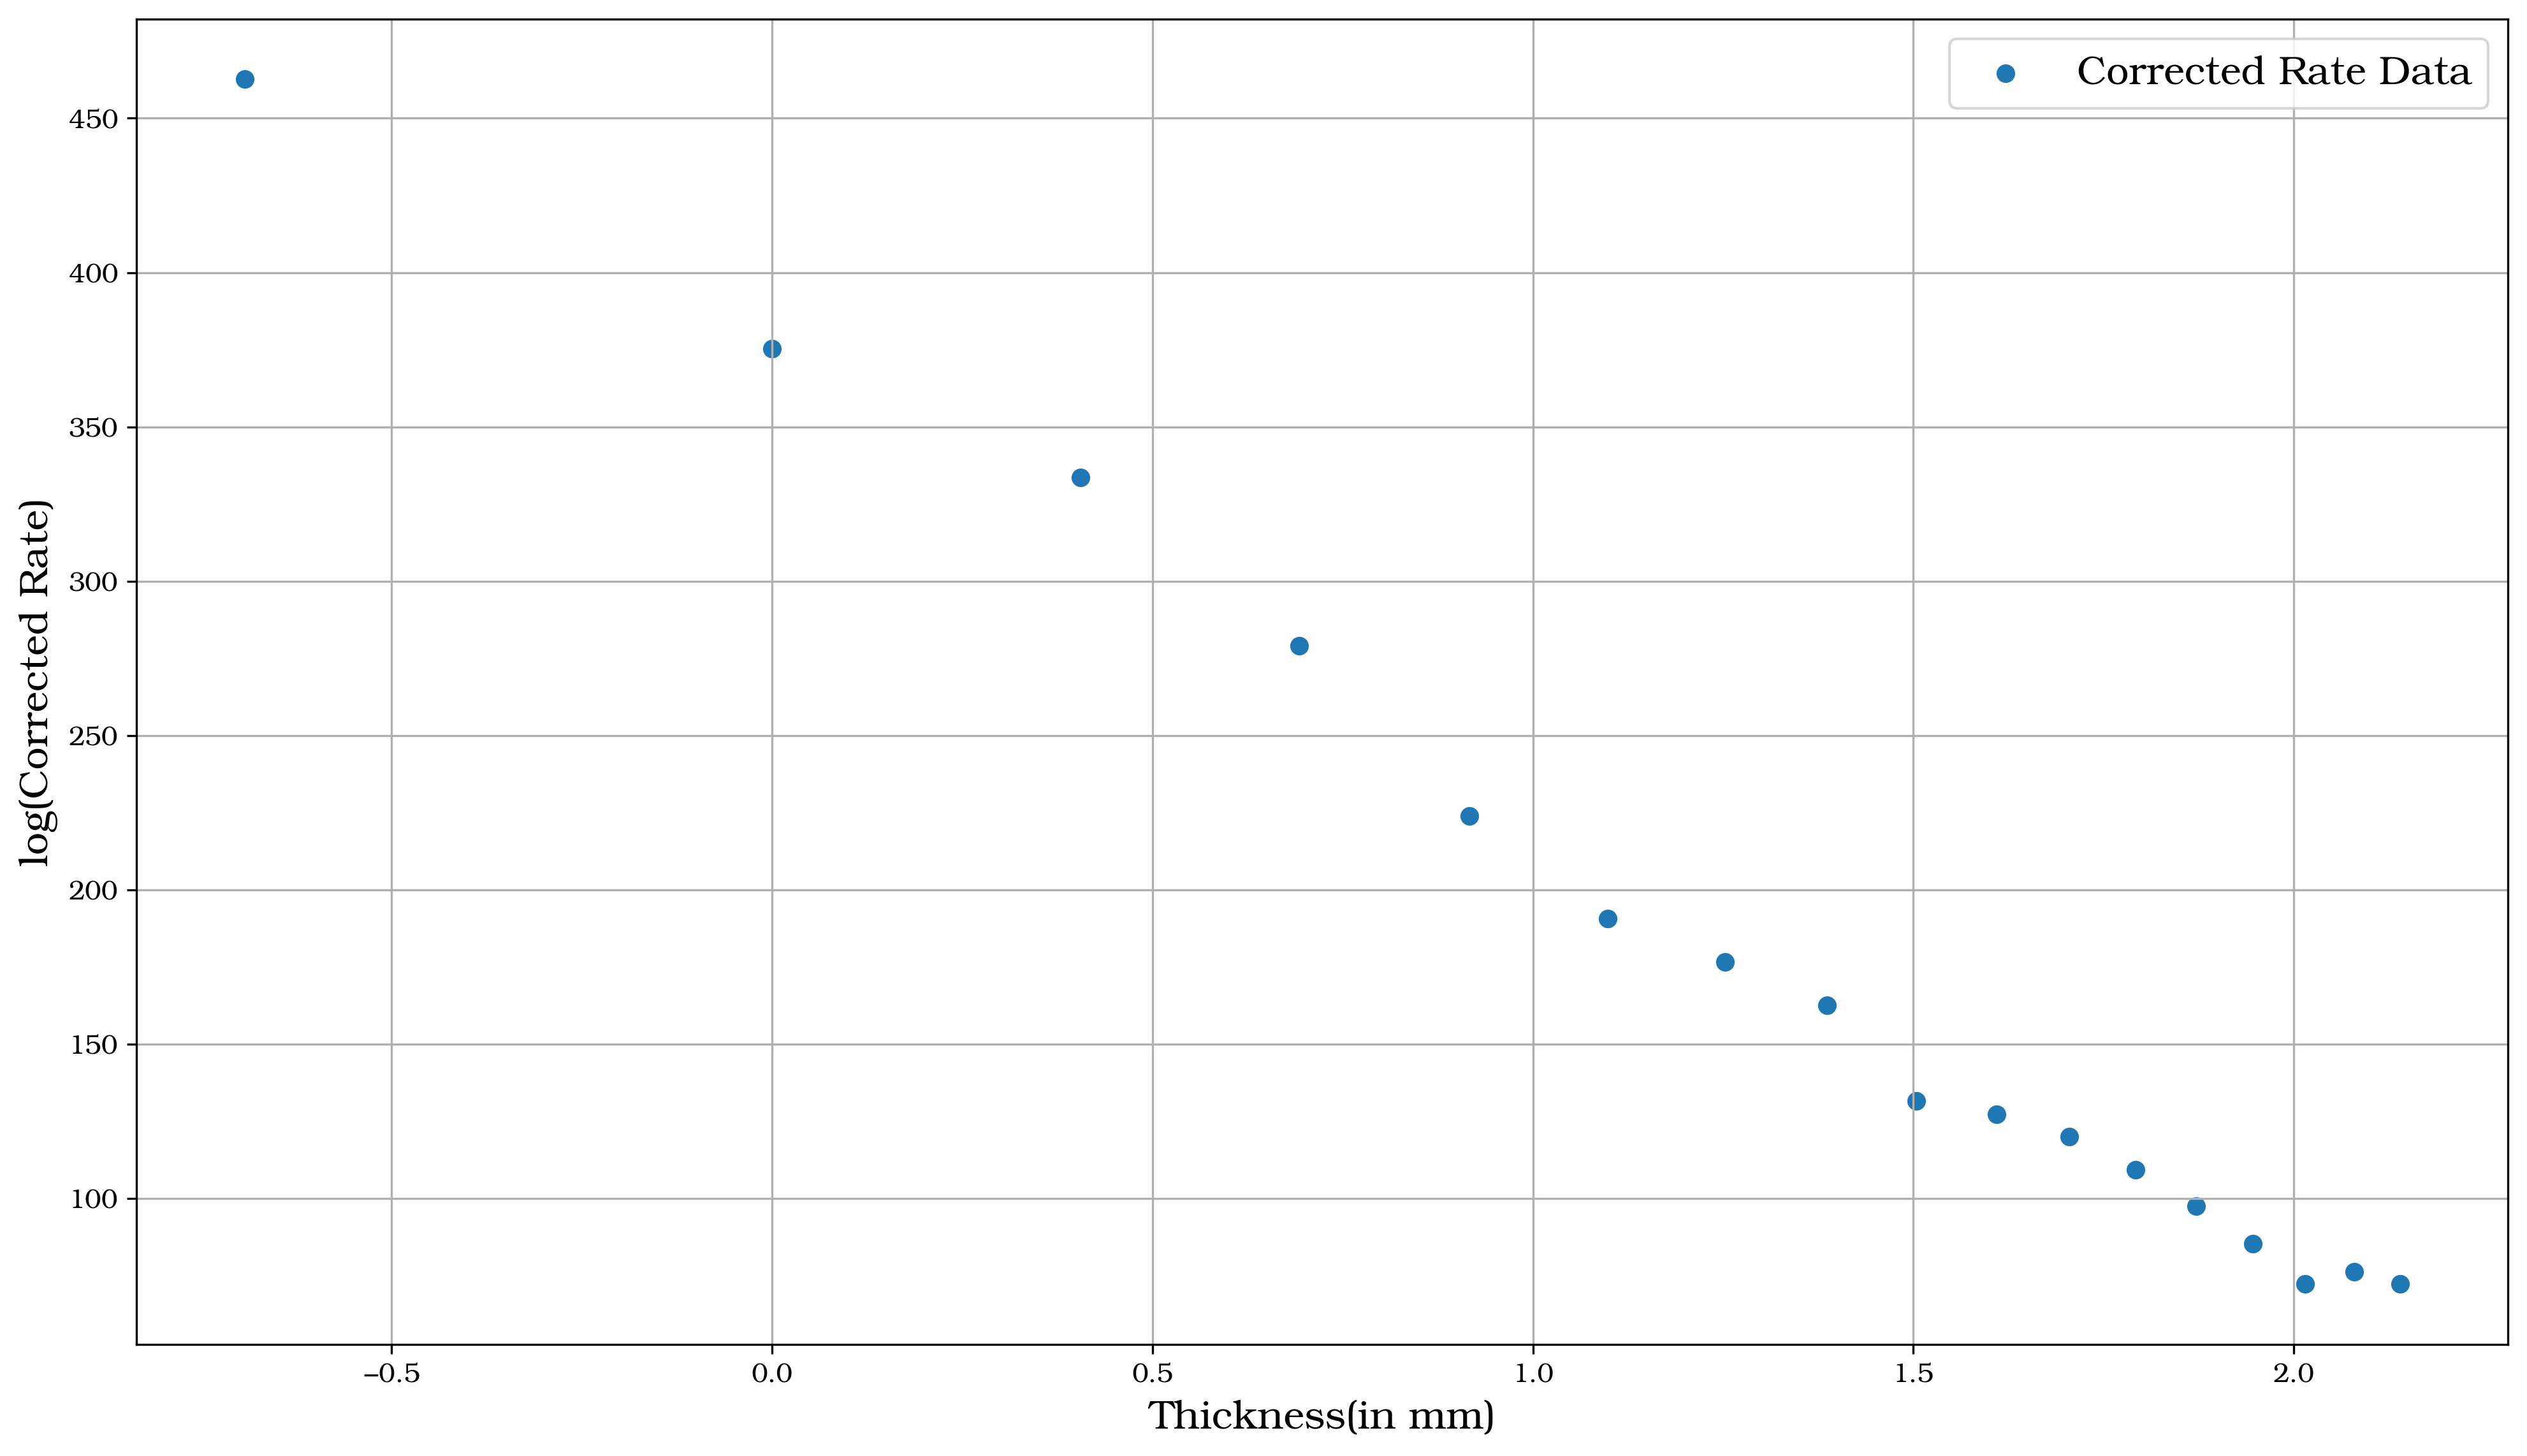

In [28]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
# axes.plot(x1,y1,'r-.',label=r"Straight line fit with $y(x) = -0.093x + 0.06$")
axes.scatter(np.log(xd),yc, label='Corrected Rate Data')
axes.legend(fontsize=15)
axes.set_xlabel("Thickness(in mm)", fontsize=15)
axes.set_ylabel("log(Corrected Rate)", fontsize=15)
axes.grid()